In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
#Data Structure
print(type)

<class 'type'>


In [4]:
data1=data.drop(['Unnamed: 0',"Temp C"],axis=1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [5]:
# Convert the Month column data type to integer datatype
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info

<bound method DataFrame.info of      Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
0     41.0    190.0   7.4    5.0    1  2010    67       S
1     36.0    118.0   8.0    5.0    2  2010    72       C
2     12.0    149.0  12.6    5.0    3  2010    74      PS
3     18.0    313.0  11.5    5.0    4  2010    62       S
4      NaN      NaN  14.3    5.0    5  2010    56       S
..     ...      ...   ...    ...  ...   ...   ...     ...
153   41.0    190.0   7.4    5.0    1  2010    67       C
154   30.0    193.0   6.9    9.0   26  2010    70      PS
155    NaN    145.0  13.2    9.0   27  2010    77       S
156   14.0    191.0  14.3    9.0   28  2010    75       S
157   18.0    131.0   8.0    9.0   29  2010    76       C

[158 rows x 8 columns]>

In [6]:
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [7]:
data1[data1.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [8]:
#Change column names(Rename the columns)
data1.rename({'Solar.R': 'Solar','Temp':'Temperature'},axis=1,inplace=True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temperature,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [9]:
#Dispaly data1 missing values count in each column using isnull().sum()
data1.isnull().sum()


Ozone          38
Solar           7
Wind            0
Month           1
Day             0
Year            0
Temperature     0
Weather         3
dtype: int64

<Axes: >

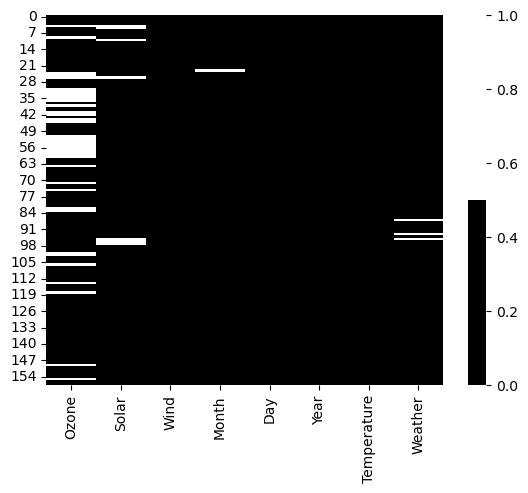

In [10]:
# Visualize data1 missing values using a chart or graph
cols = data1.columns
colours = ['black','white']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours),cbar=True)

In [11]:
# Find the mean and median values of each numeric column
#Find the mean and median values of ech numeric column
#Imputation of missing value with median
median_ozone=data1["Ozone"].median()
mean_ozone=data1["Ozone"].mean()
print("Median of Ozone :",median_ozone)
print("Mean of Ozone :",mean_ozone)

Median of Ozone : 30.5
Mean of Ozone : 41.583333333333336


In [12]:
# Find the mode values of categorial columns
data1['Ozone']=data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone          0
Solar          7
Wind           0
Month          1
Day            0
Year           0
Temperature    0
Weather        3
dtype: int64

In [13]:
data1['Solar']=data1['Solar'].fillna(median_ozone)
data1.isnull().sum()

Ozone          0
Solar          0
Wind           0
Month          1
Day            0
Year           0
Temperature    0
Weather        3
dtype: int64

In [14]:
data1['Wind']=data1['Wind'].fillna(median_ozone)
data1.isnull().sum()

Ozone          0
Solar          0
Wind           0
Month          1
Day            0
Year           0
Temperature    0
Weather        3
dtype: int64

In [32]:
# Find the mode values of categorial column (weather)
print(data1["Weather"].value_counts())
mode_weather=data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [34]:
print(data1["Month"].value_counts())
mode_month=data1["Month"].mode()[0]
print(mode_month)

Month
9.0    34
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


In [38]:
# Impute missing values (Replace NaN mode ect.) of "weather" using fillna()
data1["Month"] = data1["Month"].fillna(mode_month)
data1.isnull().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Year           0
Temperature    0
Weather        0
dtype: int64

In [42]:
data1.tail()

,Ozone,Solar,Wind,Month,Day,Year,Temperature,Weather
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,30.5,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S
157,18.0,131.0,8.0,9.0,29,2010,76,C


In [46]:
# Reset the index column
data1.reset_index(drop=True)

,Ozone,Solar,Wind,Month,Day,Year,Temperature,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,30.5,30.5,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,30.5,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


## Detection of outliers in the column
Method1: Using histogram and box plots

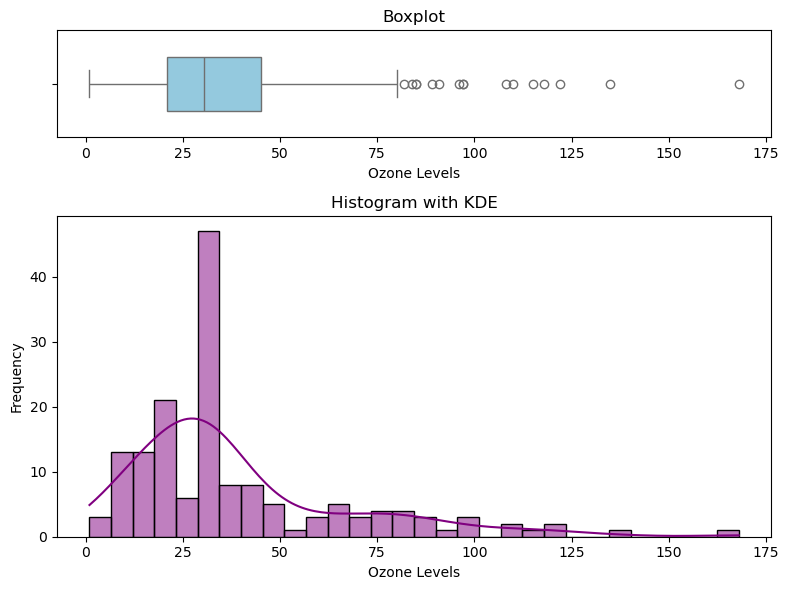

In [61]:
#Create a figure with two subplots ,stacked vertically
fig, axes=plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios':[1, 3]})
#Plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"], ax=axes[0],color='skyblue',width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
# Plot the histogram with KDE curve in the second (bottom) sublot
sns.histplot(data1["Ozone"],kde=True,ax=axes[1],color='Purple',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")
# Adjust Layout for better spaceing
plt.tight_layout()
# Show the plot 
plt.show()


# Observations
The ozone column has extreme values beyond 81 as seen from box plot   
    The same is confirmed from below right-skewed histogram

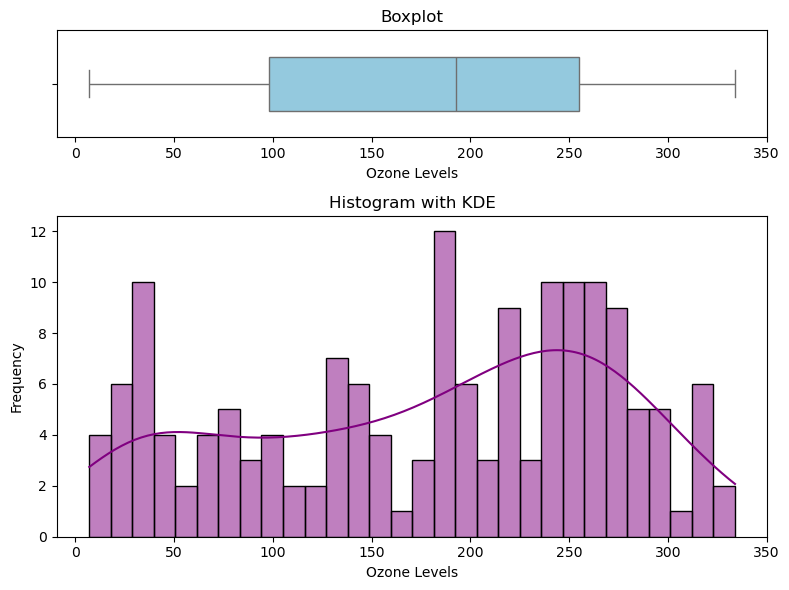

In [67]:
#Create a figure with two subplots ,stacked vertically
fig, axes=plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios':[1, 3]})
#Plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Solar"], ax=axes[0],color='skyblue',width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
# Plot the histogram with KDE curve in the second (bottom) sublot
sns.histplot(data1["Solar"],kde=True,ax=axes[1],color='Purple',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")
# Adjust Layout for better spaceing
plt.tight_layout()
# Show the plot 
plt.show()

## Observations
    The solar column has no extreme values as we seen from the boxplot
    The same is confirmed from the below right-skewed histogram